# Census Income Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


classification problem.
target feature is 'Income'.


In [3]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [4]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The data set contains 32560 rows and 15 features one is an target variable.
there is no null values are present in dataset.


In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [10]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

 As we can see no null values present in both features but there is '?'which is consider as a null values.

In [12]:
df.loc[df.Native_country==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [13]:
df.loc[df.Occupation==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Native contry contain 583 missing values and occupation contain 1816 missing values as count is huge.
we have large dataset so we can drop rows which has '?'

In [14]:
df.drop(df[df['Native_country']==' ?'].index,inplace=True)
df.drop(df[df['Occupation']==' ?'].index,inplace=True)

now checking the unique value count again it has removed or not

In [24]:
df.drop(df[df['Workclass']==' ?'].index,inplace=True)


In [18]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [27]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [15]:

#removing the unamed
df.drop(df[df['Occupation']==' ?'].index,inplace=True)

In [16]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [17]:
df.shape

(30161, 15)

In [39]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print('cat_col:',cat_col)
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('num_col:',num_col)

cat_col: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
num_col: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


<AxesSubplot:>

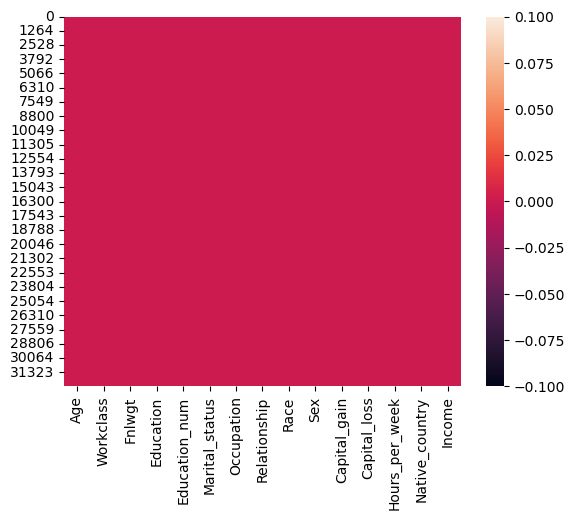

In [29]:
sns.heatmap(df.isnull())

In [30]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,1.897976e+05,10.121216,1091.971984,88.375419,40.931269
std,13.134882,1.056527e+05,2.549983,7406.466659,404.304753,11.980182
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176280e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784290e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376300e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

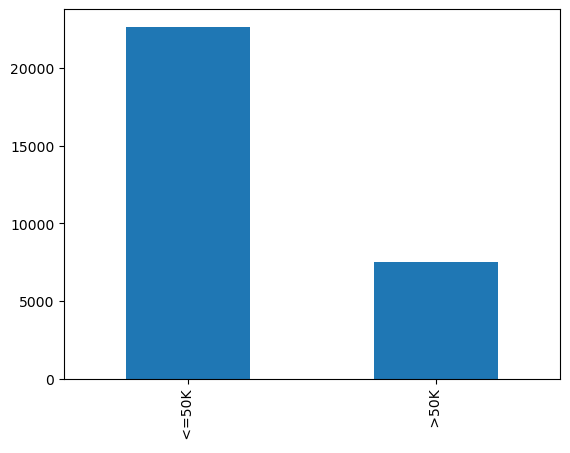

In [28]:
df['Income'].value_counts().plot(kind='bar')

As per above visualization of target variable we can see the ratio is imbalanced.

In [31]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:xlabel='Education'>

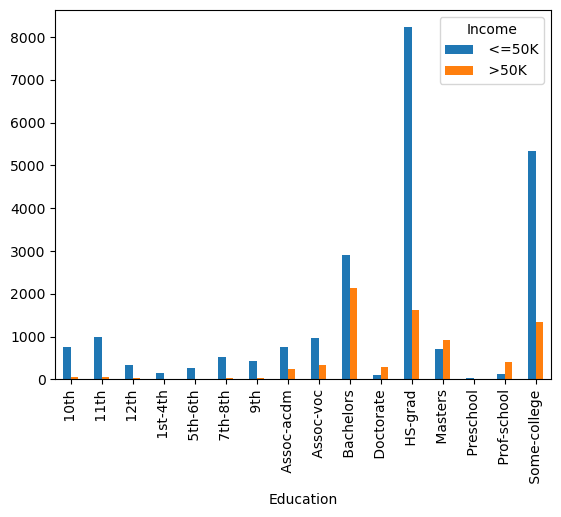

In [32]:
ax = pd.crosstab(df['Education'],df['Income'])
ax.plot(kind='bar')

<AxesSubplot:xlabel='Sex'>

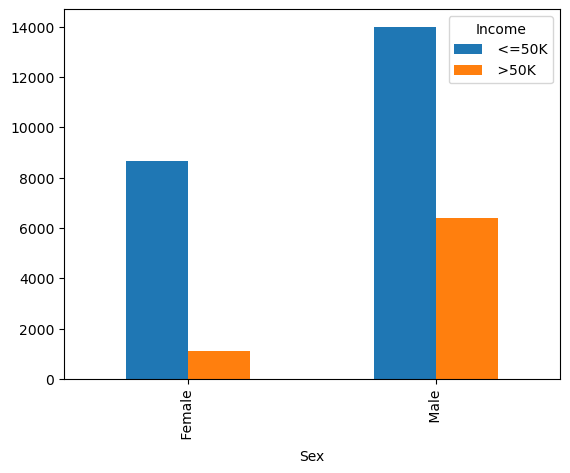

In [34]:
ax = pd.crosstab(df['Sex'],df['Income'])
ax.plot(kind='bar')

<AxesSubplot:xlabel='Workclass'>

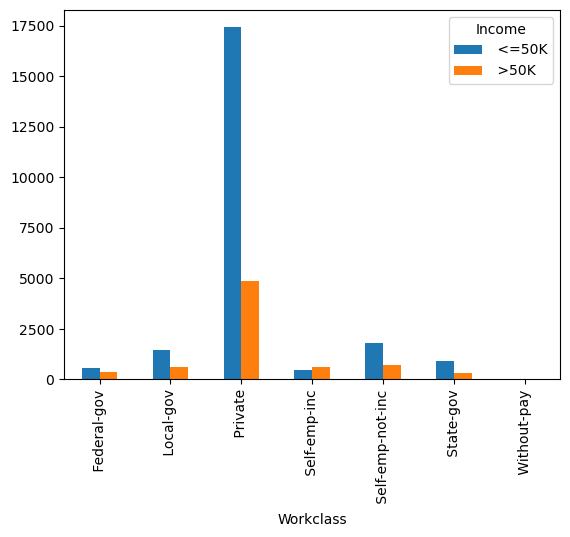

In [35]:
ax = pd.crosstab(df['Workclass'],df['Income'])
ax.plot(kind='bar')

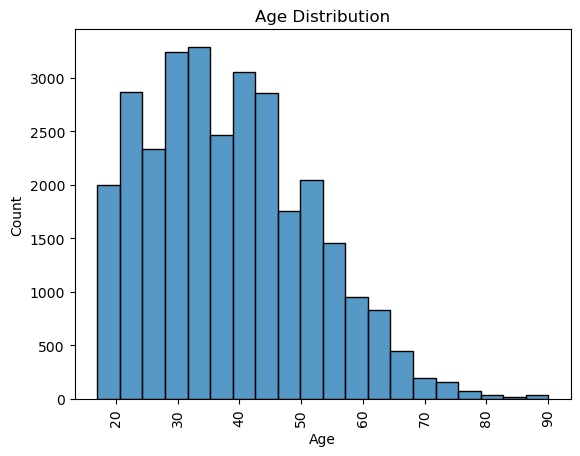

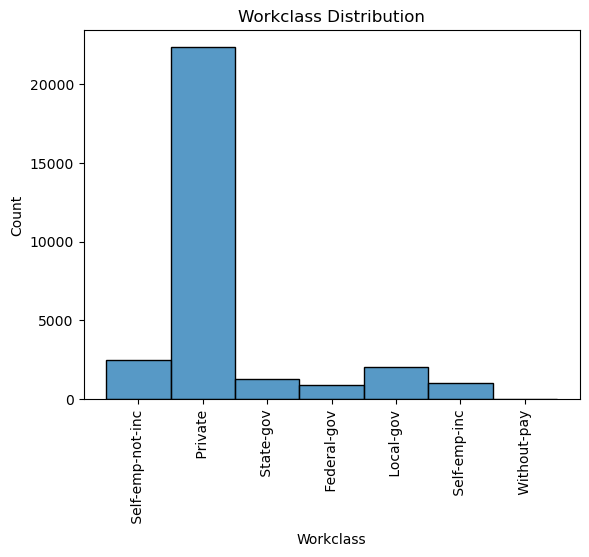

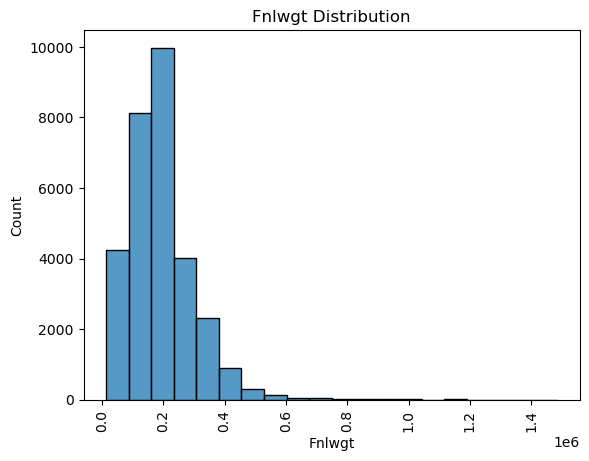

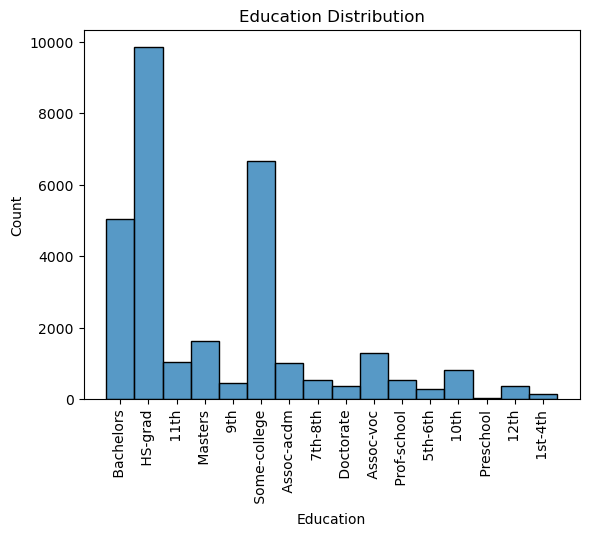

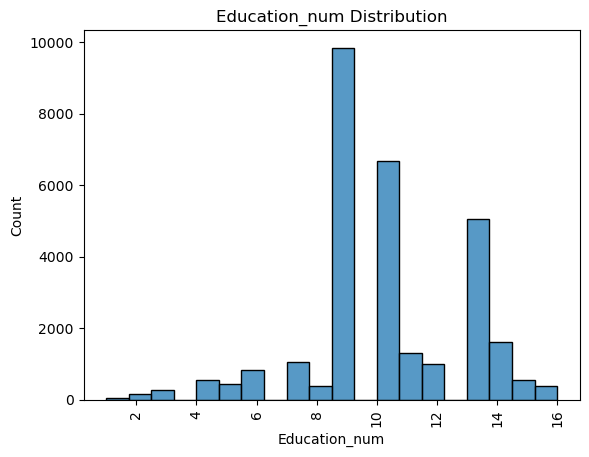

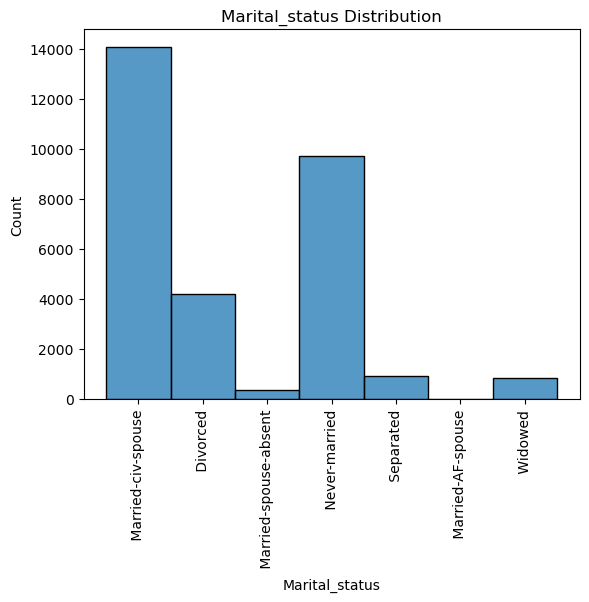

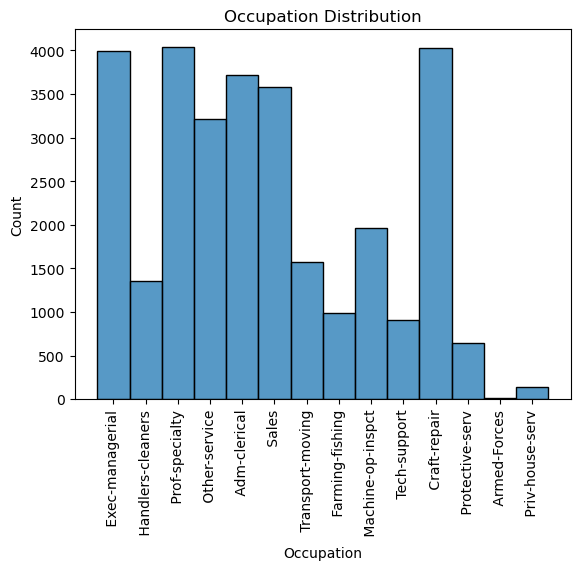

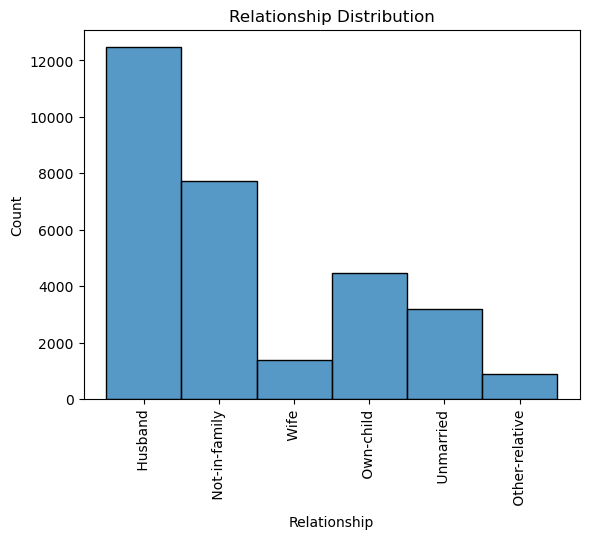

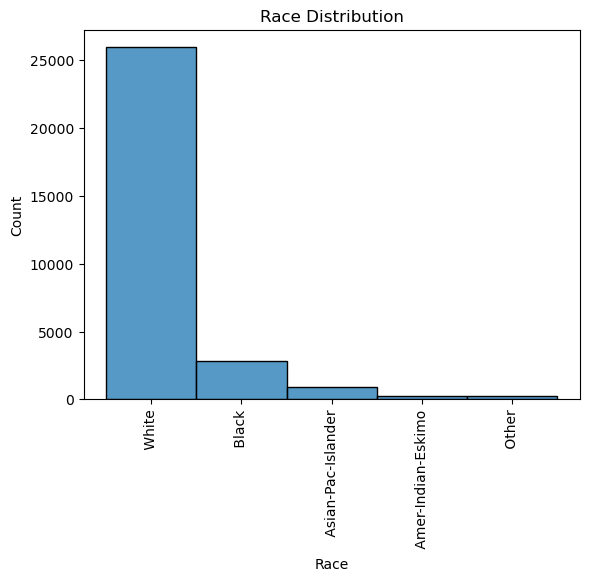

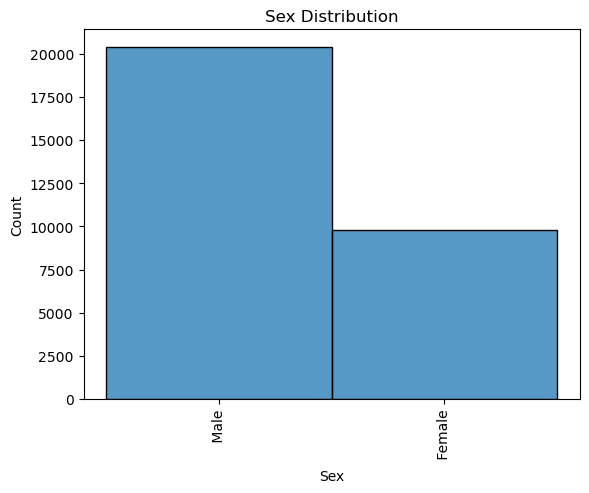

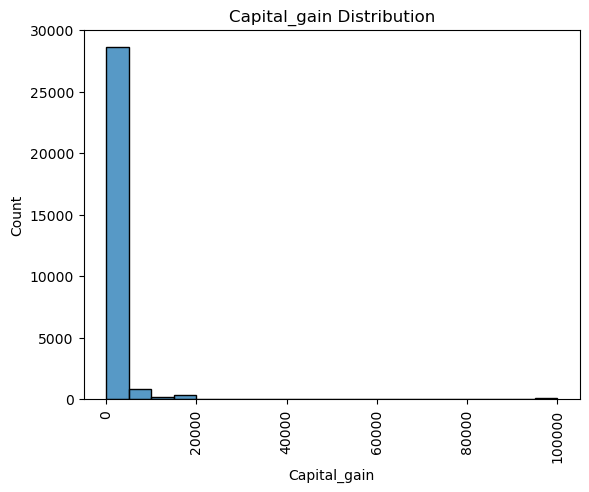

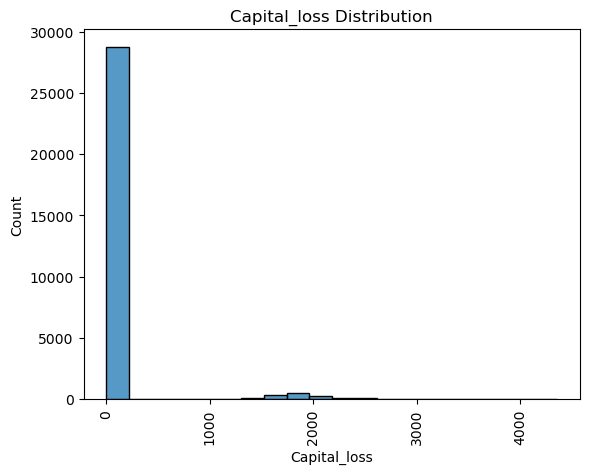

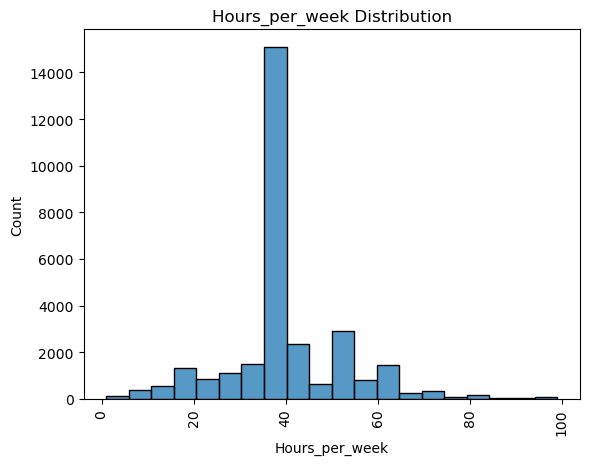

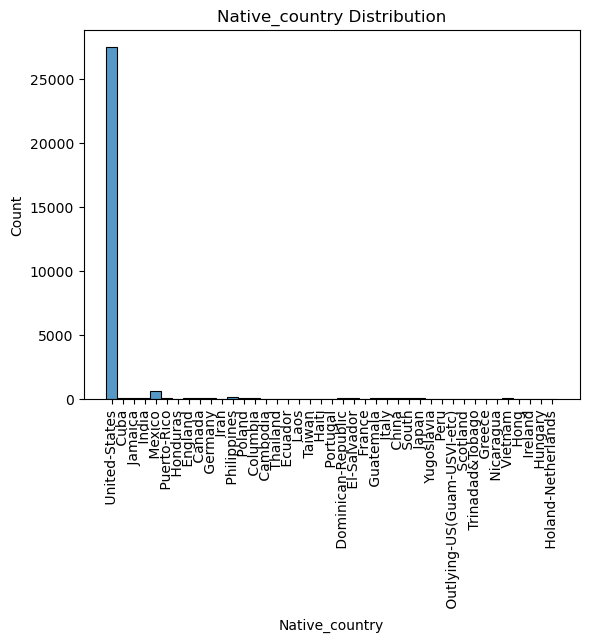

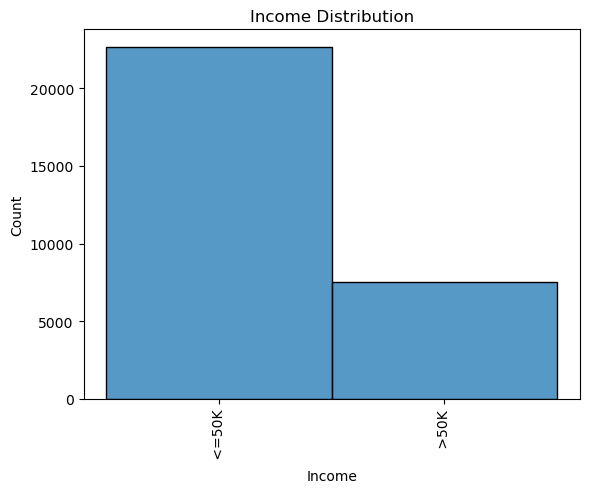

In [37]:
for i in df.columns:
    sns.histplot(x=i,data=df,kde=False,bins=20)
    plt.title(f'{i} Distribution')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

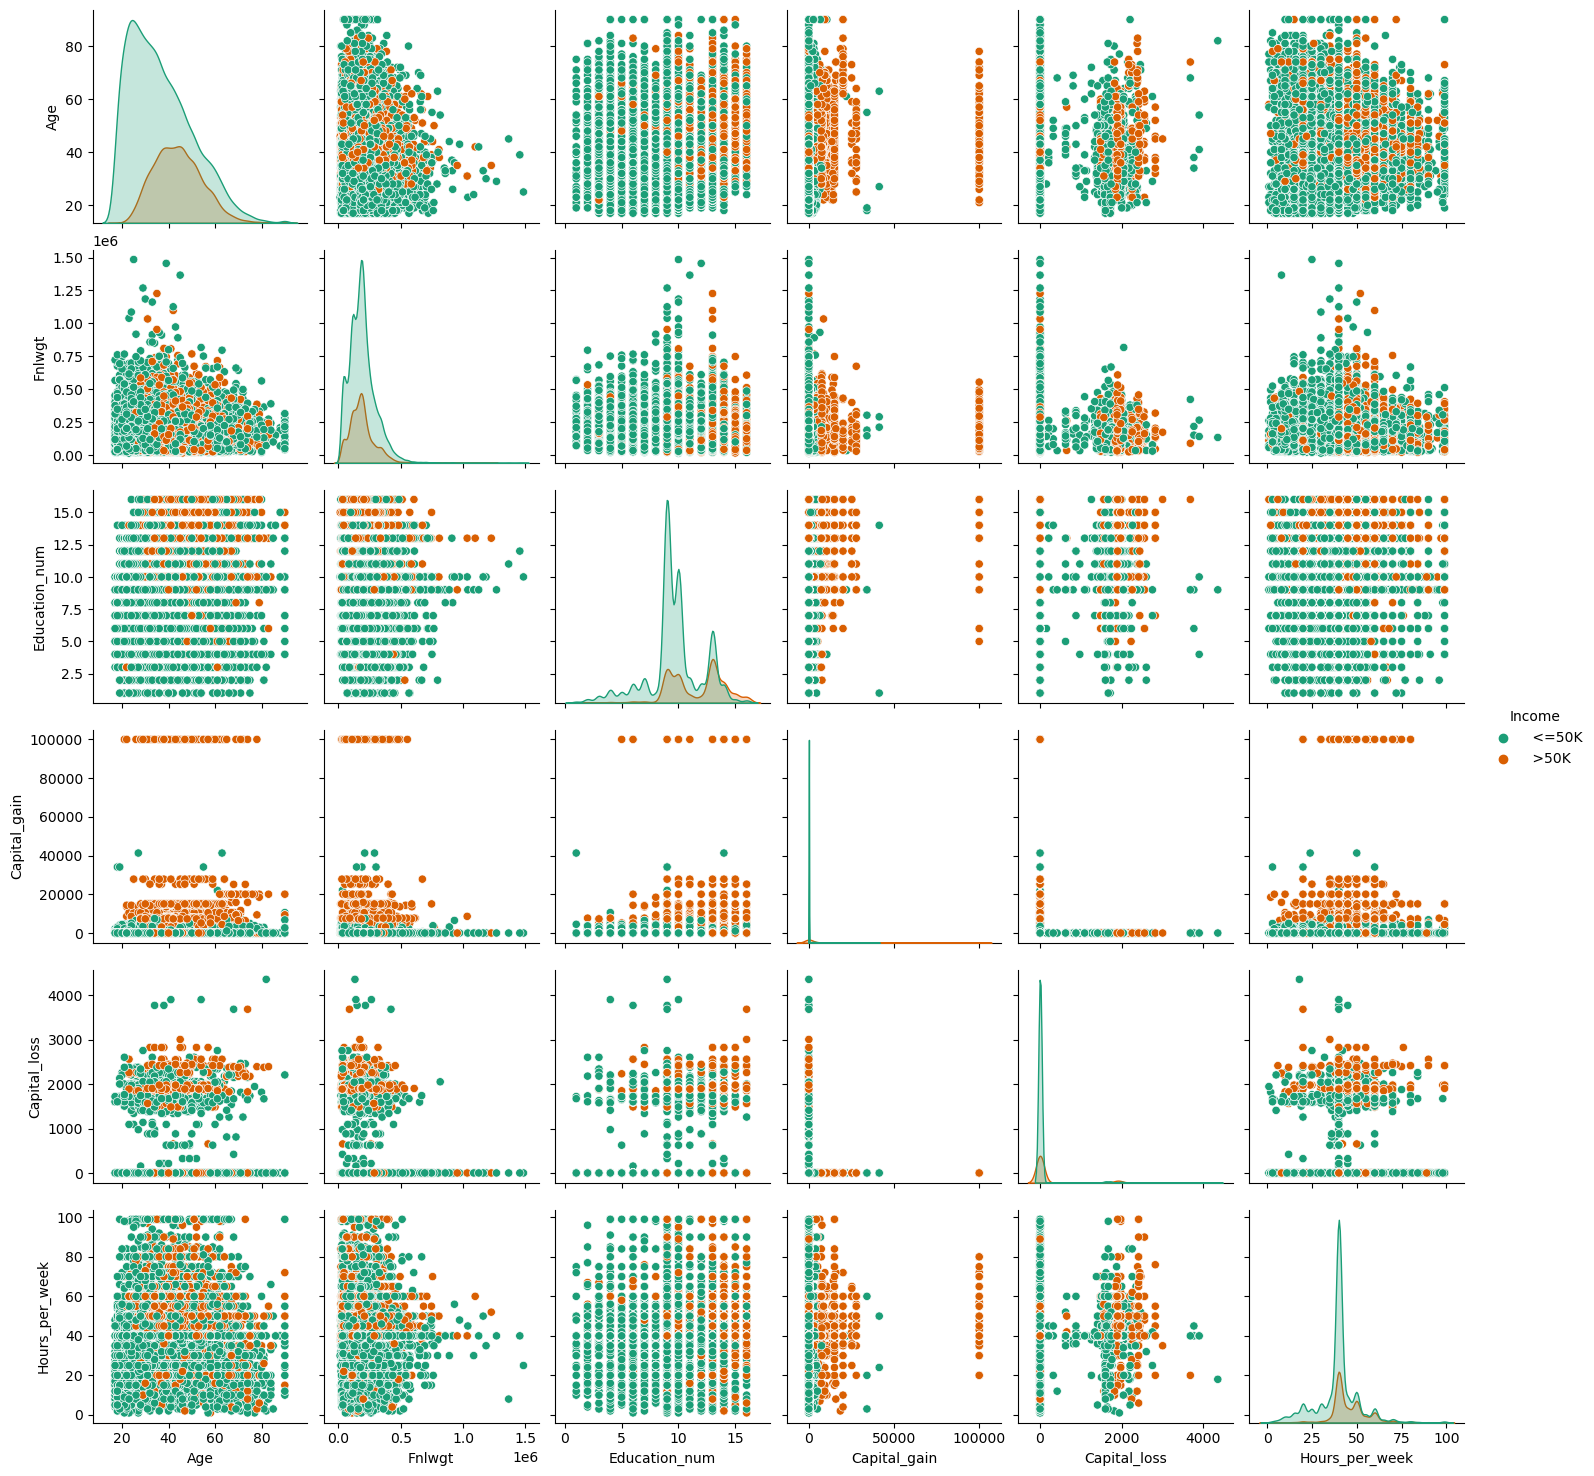

In [38]:
sns.pairplot(df,hue='Income',palette='Dark2')
plt.show()

# Checking for outliers

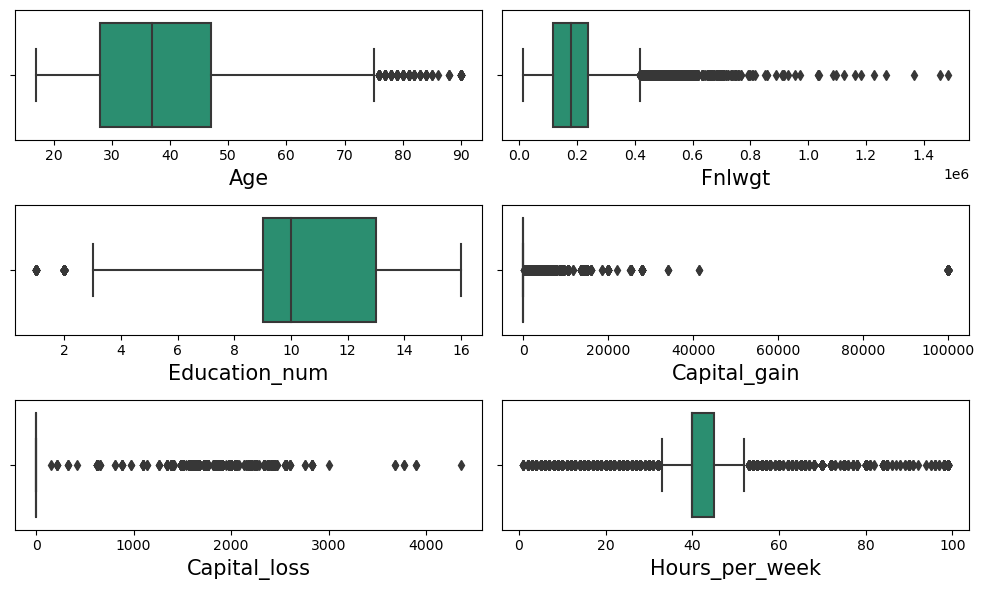

In [42]:
plt.figure(figsize=(10,6),facecolor='white')
plot = 1
for col in num_col:
    if plot<15:
        ax = plt.subplot(3,2,plot)
        sns.boxplot(df[col],palette='Dark2')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plot+=1
plt.tight_layout()

# checking for skewness

In [64]:
df.skew()

Age                0.473493
Workclass          1.210500
Fnlwgt             0.626305
Education         -0.962517
Education_num     -0.141425
Marital_status    -0.081588
Occupation         0.126748
Relationship       0.737581
Race              -2.600449
Sex               -0.679352
Capital_gain       6.284900
Capital_loss      23.781419
Hours_per_week    -0.288624
Native_country    -5.226029
Income             1.522199
dtype: float64

# Encoding Categorical Columns

In [50]:
from sklearn.preprocessing import OrdinalEncoder

In [51]:
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0.000000,0,13,38.0,0.0
1,38,2.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0.000000,0,40,38.0,0.0
2,53,2.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0.000000,0,40,38.0,0.0
3,28,2.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0.000000,0,40,4.0,0.0
4,37,2.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0.000000,0,40,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0.000000,0,38,38.0,0.0
32556,40,2.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0.000000,0,40,38.0,1.0
32557,58,2.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0.000000,0,40,38.0,0.0
32558,22,2.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0.000000,0,20,38.0,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             30161 non-null  int64  
 1   Workclass       30161 non-null  float64
 2   Fnlwgt          30161 non-null  int64  
 3   Education       30161 non-null  float64
 4   Education_num   30161 non-null  int64  
 5   Marital_status  30161 non-null  float64
 6   Occupation      30161 non-null  float64
 7   Relationship    30161 non-null  float64
 8   Race            30161 non-null  float64
 9   Sex             30161 non-null  float64
 10  Capital_gain    30161 non-null  float64
 11  Capital_loss    30161 non-null  int64  
 12  Hours_per_week  30161 non-null  int64  
 13  Native_country  30161 non-null  float64
 14  Income          30161 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 4.7 MB


In [53]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,30161.000000,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,2.199231,1.897976e+05,10.333809,10.121216,2.580087,5.960048,1.418355,3.678592,0.675674,0.225990,88.375419,40.931269,36.382514,0.248931
std,13.134882,0.953804,1.056527e+05,3.812347,2.549983,1.498018,4.029487,1.601363,0.834721,0.468130,0.751155,404.304753,11.980182,6.105467,0.432401
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176280e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784290e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376300e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,3.593810,4356.000000,99.000000,40.000000,1.000000


# Remove Outliers

In [43]:
from scipy.stats import zscore

In [54]:
zs = np.abs(zscore(df))
zs

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.880275,1.888018,1.007909,0.349871,1.128961,0.387243,0.734609,0.885732,0.385055,0.692823,0.300862,0.21859,2.331495,0.264929,0.575704
1,0.033338,0.208884,0.244659,0.174749,0.439703,1.722362,0.238260,0.261254,0.385055,0.692823,0.300862,0.21859,0.077735,0.264929,0.575704
2,1.108678,0.208884,0.425206,2.448351,1.224035,0.387243,0.238260,0.885732,2.010994,0.692823,0.300862,0.21859,0.077735,0.264929,0.575704
3,0.794682,0.208884,1.406626,0.349871,1.128961,0.387243,0.754439,2.236660,2.010994,1.443370,0.300862,0.21859,0.077735,5.303944,0.575704
4,0.109472,0.208884,0.897147,0.437059,1.521127,0.387243,0.734609,2.236660,0.385055,1.443370,0.300862,0.21859,0.077735,0.264929,0.575704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.870817,0.208884,0.638938,0.874491,0.736795,0.387243,1.498963,2.236660,0.385055,1.443370,0.300862,0.21859,0.244681,0.264929,0.575704
32556,0.118931,0.208884,0.335288,0.174749,0.439703,0.387243,0.009915,0.885732,0.385055,0.692823,0.300862,0.21859,0.077735,0.264929,1.737004
32557,1.489350,0.208884,0.358611,0.174749,0.439703,2.282996,1.479133,1.612182,0.385055,1.443370,0.300862,0.21859,0.077735,0.264929,0.575704
32558,1.251489,0.208884,0.110670,0.174749,0.439703,0.947877,1.479133,0.987703,0.385055,0.692823,0.300862,0.21859,1.747187,0.264929,0.575704


In [55]:
threshold = 3
print(np.where(zs<3))
print(df.shape)

(array([    0,     0,     0, ..., 30160, 30160, 30160], dtype=int64), array([ 0,  1,  2, ..., 12, 13, 14], dtype=int64))
(30161, 15)


In [56]:
df_new = df[(zs<3).all(axis=1)]

In [57]:
print(df.shape)
print(df_new.shape)

(30161, 15)
(24225, 15)


In [58]:
df=df_new
print('after removing outliers:',df.shape)

after removing outliers: (24225, 15)


# Data Distribution

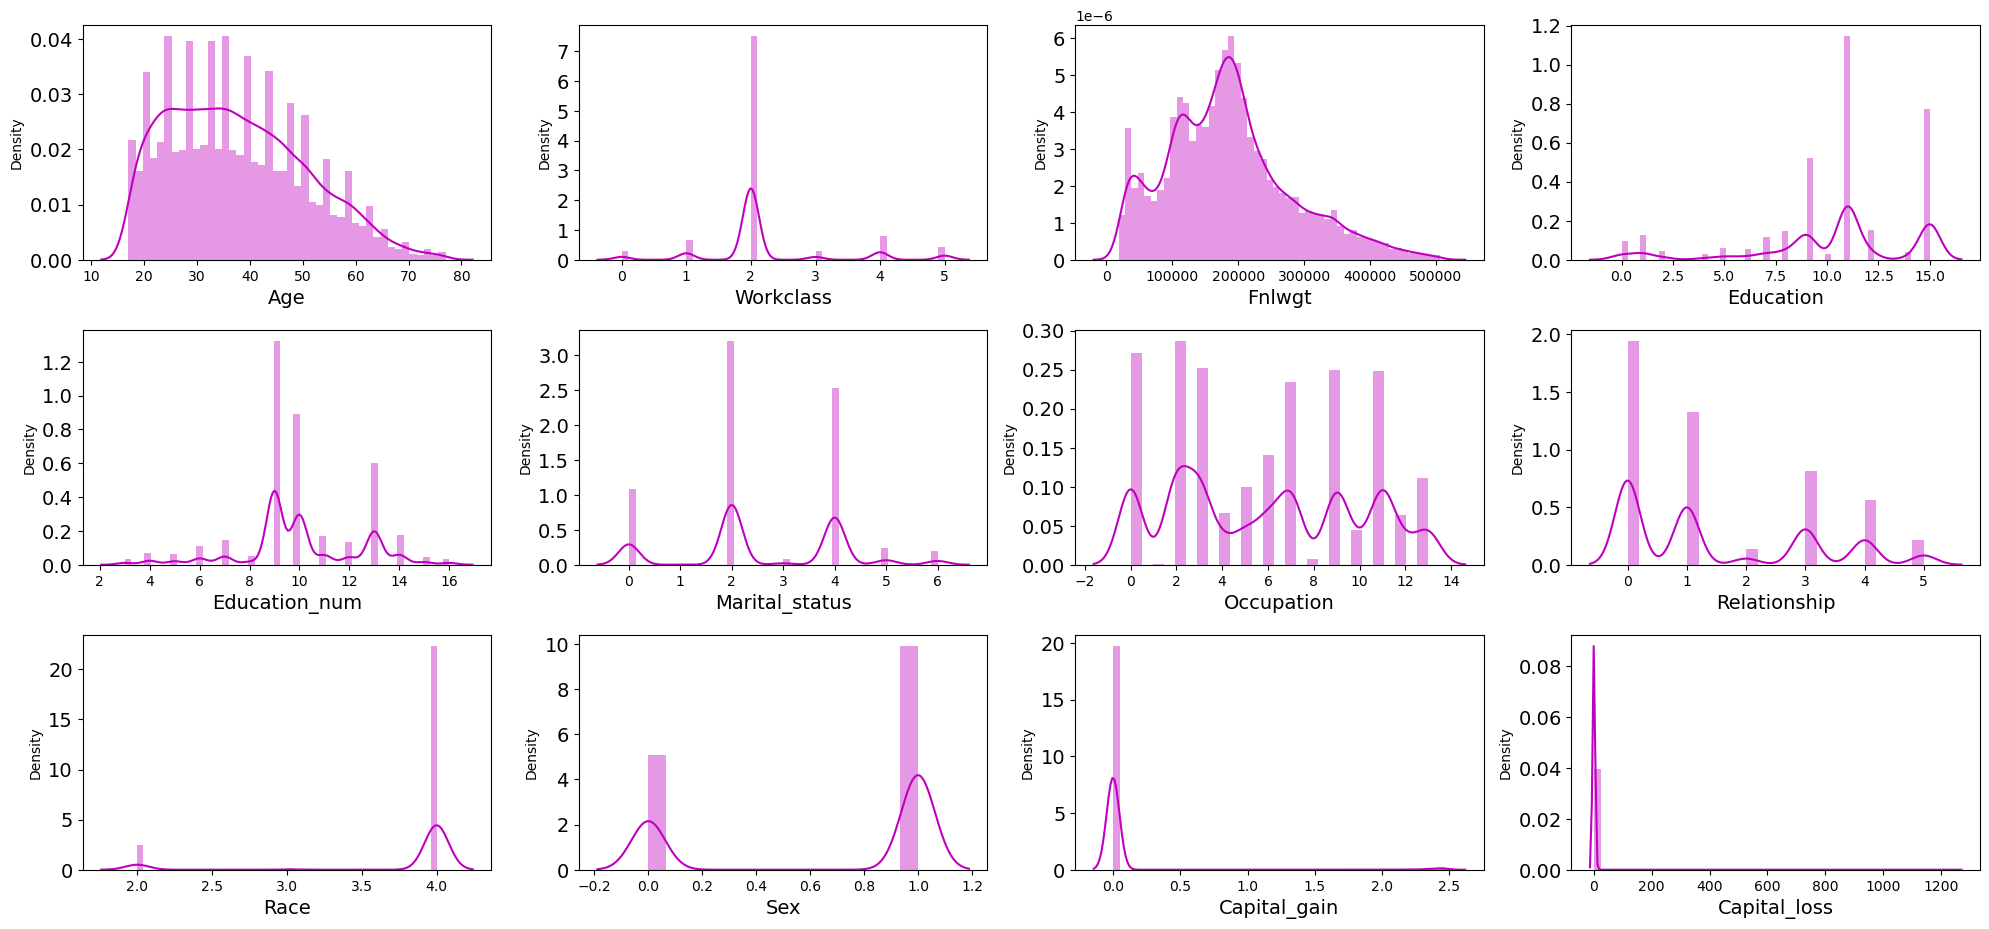

In [60]:
plt.figure(figsize=(20,15),facecolor='white')
plot = 1
for col in df.columns:
    if plot<=12:
        a = plt.subplot(5,4,plot)
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=14)
        plt.yticks(rotation=0,fontsize=14)
    plot+=1
plt.tight_layout()

# correlation between target variable and independant variable

In [73]:
cor = df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.027260,-0.078895,0.000833,0.031624,-0.296648,-0.007403,-0.251319,0.013267,0.072744,0.037586,0.024370,0.120296,0.034864,0.227714
Workclass,0.027260,1.000000,-0.023837,-0.007448,-0.008939,-0.014152,0.030370,-0.054676,0.076108,0.066953,0.008604,-0.010502,0.027004,0.001912,-0.018821
Fnlwgt,-0.078895,-0.023837,1.000000,-0.018910,-0.041904,0.034511,-0.003877,0.016100,-0.105537,0.021922,-0.007999,-0.002576,-0.024440,-0.112352,-0.013024
Education,0.000833,-0.007448,-0.018910,1.000000,0.343291,-0.034744,-0.041536,-0.010012,0.018340,-0.033881,-0.002150,-0.003031,0.062227,0.095666,0.067541
Education_num,0.031624,-0.008939,-0.041904,0.343291,1.000000,-0.041977,0.086291,-0.079219,0.076936,-0.013649,-0.020730,0.006236,0.147976,0.155796,0.293857
Marital_status,-0.296648,-0.014152,0.034511,-0.034744,-0.041977,1.000000,0.026861,0.175548,-0.084070,-0.110966,-0.011245,-0.018664,-0.199814,-0.033911,-0.179340
Occupation,-0.007403,0.030370,-0.003877,-0.041536,0.086291,0.026861,1.000000,-0.056739,0.005810,0.066198,-0.006366,-0.000840,0.006685,0.019342,0.045192
Relationship,-0.251319,-0.054676,0.016100,-0.010012,-0.079219,0.175548,-0.056739,1.000000,-0.147809,-0.568278,-0.010448,0.042720,-0.268634,-0.009451,-0.238324
Race,0.013267,0.076108,-0.105537,0.018340,0.076936,-0.084070,0.005810,-0.147809,1.000000,0.126370,0.005791,-0.003356,0.062588,0.024483,0.091761
Sex,0.072744,0.066953,0.021922,-0.033881,-0.013649,-0.110966,0.066198,-0.568278,0.126370,1.000000,0.013200,-0.038088,0.234249,-0.014627,0.204094


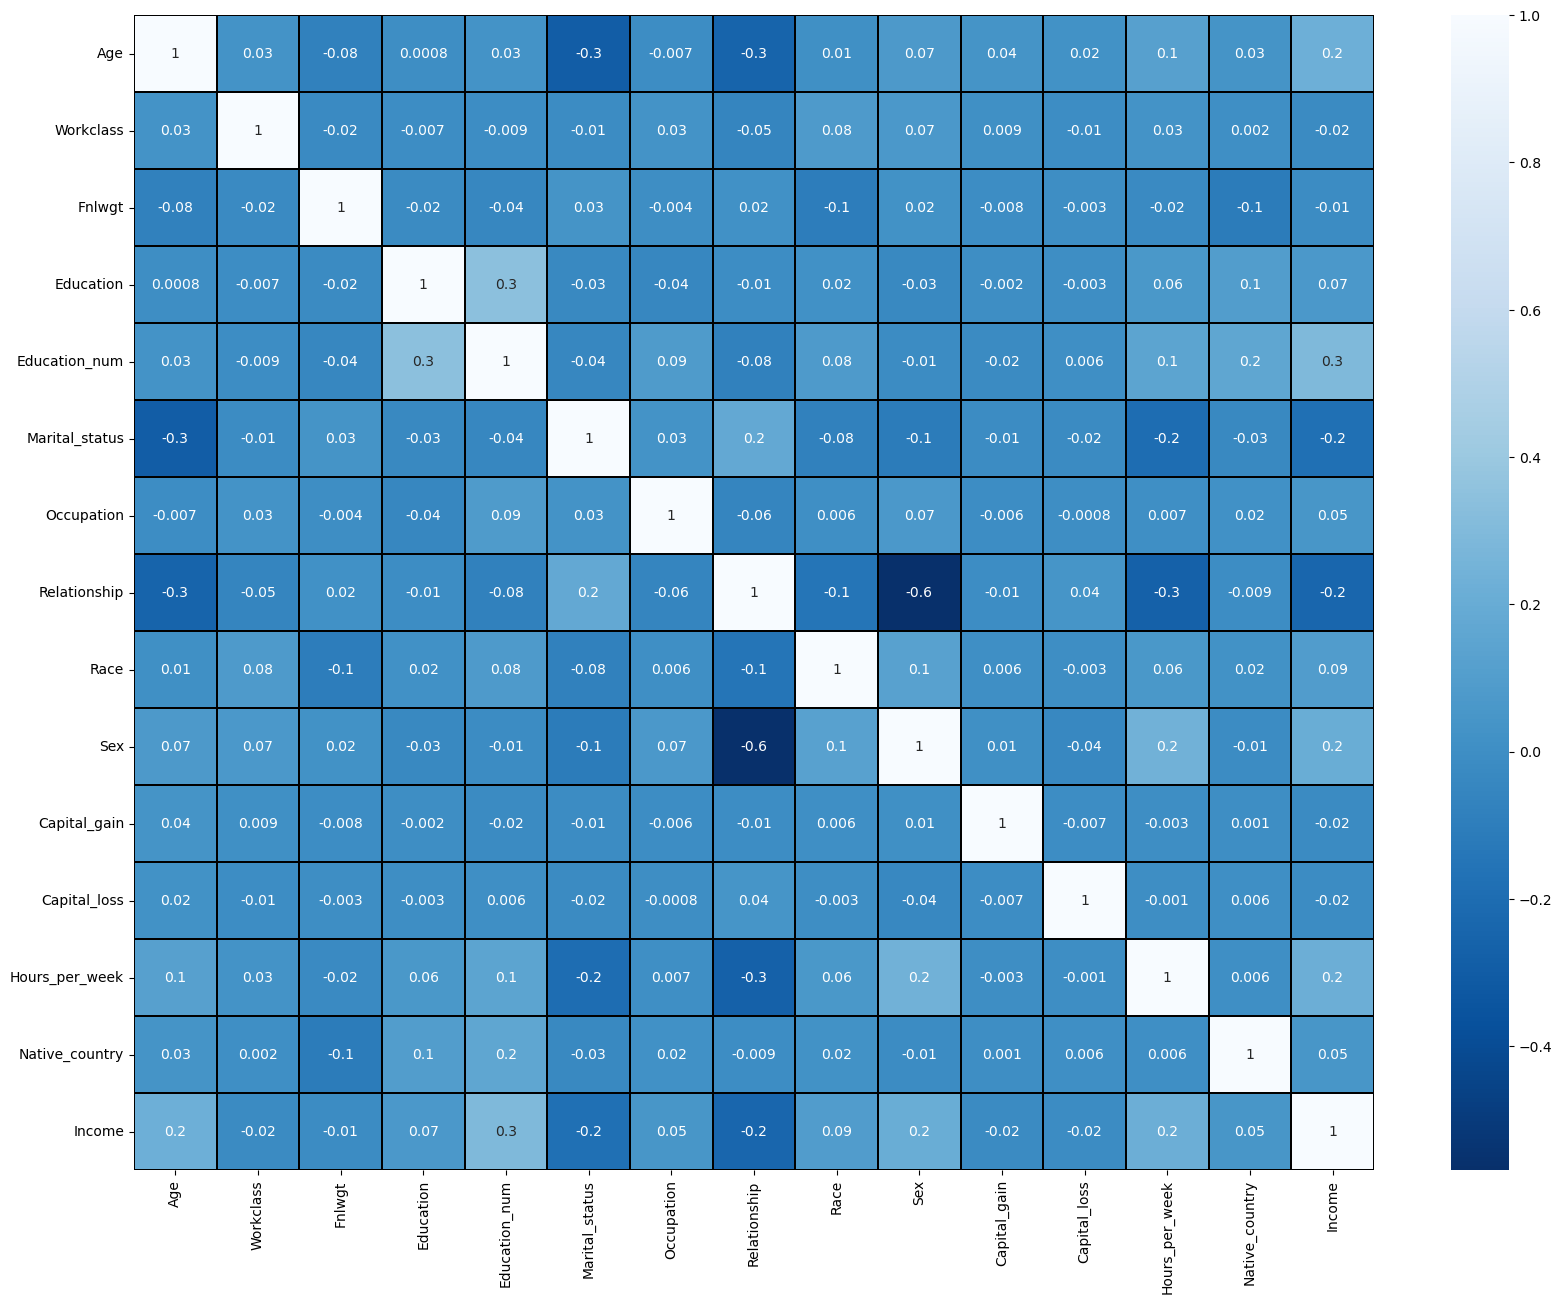

In [74]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()

In [75]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.293857
Age               0.227714
Hours_per_week    0.220345
Sex               0.204094
Race              0.091761
Education         0.067541
Native_country    0.045313
Occupation        0.045192
Fnlwgt           -0.013024
Capital_loss     -0.015970
Workclass        -0.018821
Capital_gain     -0.021517
Marital_status   -0.179340
Relationship     -0.238324
Name: Income, dtype: float64

There is positive correlation of Income with education,age,hours per week,sex,race,native country,and occupation.
There is negation correlation of capital loss,capital gain,marital status,relatioship with Income.

# Visualizing the correlation between target and feature using barplot

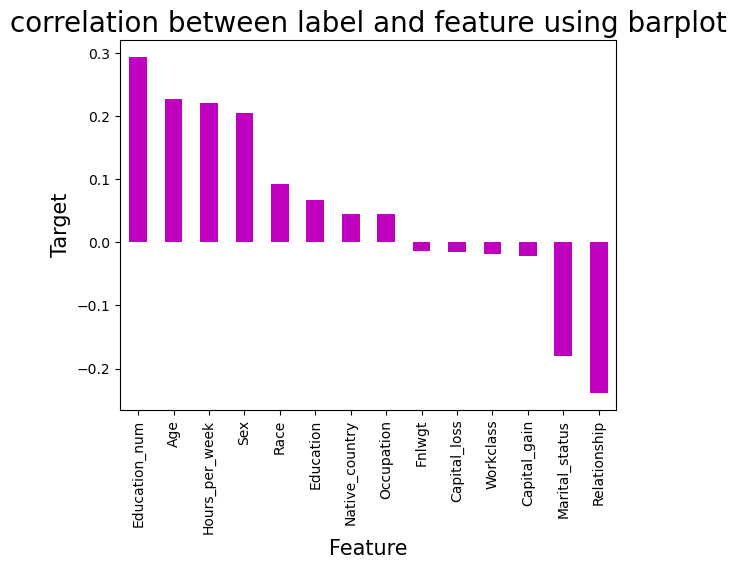

In [76]:
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using barplot',fontsize=20)
plt.show()

# Seperating Feature and Label

In [77]:
x= df.drop('Income',axis=1)
y= df['Income']

# Feature Scaling using Standard Scalarization

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.957617,1.634804,-1.086502,-0.349173,1.255737,-0.397142,-0.718036,-0.925503,0.343160,0.716454,-0.155903,-0.042168,-2.511126,0.194243
1,0.027143,-0.060153,0.309562,0.168750,-0.430248,-1.703779,-0.224906,-0.298396,0.343160,0.716454,-0.155903,-0.042168,-0.014641,0.194243
2,1.190235,-0.060153,0.510793,-2.420868,-1.273241,-0.397142,-0.224906,-0.925503,-2.967492,0.716454,-0.155903,-0.042168,-0.014641,0.194243
3,-0.050397,-0.060153,1.036800,0.427712,1.677234,-0.397142,-0.718036,2.210029,0.343160,-1.395764,-0.155903,-0.042168,-0.014641,0.194243
4,0.880077,-0.060153,-0.275501,-1.126059,-2.116234,0.256176,0.268224,-0.298396,-2.967492,-1.395764,-0.155903,-0.042168,-2.233739,-6.189381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24220,-1.213489,-0.060153,1.306550,1.204597,-0.008752,0.909495,1.007919,-0.298396,0.343160,0.716454,-0.155903,-0.042168,-0.014641,0.194243
24221,-0.825792,-0.060153,0.749011,-0.867097,0.834241,-0.397142,1.501049,2.210029,0.343160,-1.395764,-0.155903,-0.042168,-0.199566,0.194243
24222,0.182222,-0.060153,-0.336825,0.168750,-0.430248,-0.397142,0.021659,-0.925503,0.343160,0.716454,-0.155903,-0.042168,-0.014641,0.194243
24223,1.577933,-0.060153,-0.362819,0.168750,-0.430248,2.216131,-1.457731,1.582923,0.343160,-1.395764,-0.155903,-0.042168,-0.014641,0.194243


To remove biasness of columns we use standard scaler method.

# Checking for VIF

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.170724,Age
1,1.011297,Workclass
2,1.031899,Fnlwgt
3,1.144732,Education
4,1.203103,Education_num
5,1.144091,Marital_status
6,1.020955,Occupation
7,1.644055,Relationship
8,1.051504,Race
9,1.531934,Sex


# Oversampling

In [81]:
y.value_counts()

0.0    19448
1.0     4777
Name: Income, dtype: int64

As we can see that the data is not balanced, since it is a classification problem we will balance the data using oversampling method.

In [82]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

In [83]:
y1.value_counts()#values are balanced

0.0    19448
1.0    19448
Name: Income, dtype: int64

# Modeling

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [86]:
maxac =0
maxrs = 0
for i in range(40,70):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=i)
    rfr = RandomForestClassifier()
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxrs = i
        
    
print('best accuracy:',maxac,'at rando state:',maxrs)

best accuracy: 0.9041905904533379 at rando state: 54


In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=maxrs)

In [89]:
y_train

26663    0.0
16886    0.0
26802    1.0
10917    0.0
4955     0.0
        ... 
15528    0.0
6931     0.0
23147    0.0
10091    0.0
9812     0.0
Name: Income, Length: 16957, dtype: float64

# Classification Algorithm

In [100]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score,GridSearchCV

In [90]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.837094111172262
[[5403  427]
 [ 757  681]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      5830
         1.0       0.61      0.47      0.53      1438

    accuracy                           0.84      7268
   macro avg       0.75      0.70      0.72      7268
weighted avg       0.83      0.84      0.83      7268



In [91]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.82168409466153
[[5552  278]
 [1018  420]]
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      5830
         1.0       0.60      0.29      0.39      1438

    accuracy                           0.82      7268
   macro avg       0.72      0.62      0.64      7268
weighted avg       0.80      0.82      0.80      7268



In [92]:
gr = GradientBoostingClassifier()
gr.fit(x_train,y_train)
predgr = gr.predict(x_test)
print(accuracy_score(y_test,predgr))
print(confusion_matrix(y_test,predgr))
print(classification_report(y_test,predgr))

0.852779306549257
[[5493  337]
 [ 733  705]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      5830
         1.0       0.68      0.49      0.57      1438

    accuracy                           0.85      7268
   macro avg       0.78      0.72      0.74      7268
weighted avg       0.84      0.85      0.84      7268



In [93]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
predad = ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8490643918547056
[[5473  357]
 [ 740  698]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      5830
         1.0       0.66      0.49      0.56      1438

    accuracy                           0.85      7268
   macro avg       0.77      0.71      0.73      7268
weighted avg       0.84      0.85      0.84      7268



In [94]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
predet = et.predict(x_test)
print(accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))

0.8326912493120529
[[5375  455]
 [ 761  677]]
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      5830
         1.0       0.60      0.47      0.53      1438

    accuracy                           0.83      7268
   macro avg       0.74      0.70      0.71      7268
weighted avg       0.82      0.83      0.82      7268



# Cross Validation Score

In [95]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,predrfc)-score.mean())

[0.84231166 0.84086687 0.84004128 0.84705882 0.84293086]
0.8426418988648091
-0.005547787692547157


In [96]:
score = cross_val_score(gr,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,predgr)-score.mean())

[0.84871001 0.85717234 0.85985552 0.86418989 0.85139319]
0.8562641898864809
-0.003484883337223854


In [97]:
score = cross_val_score(et,x,y)
print(score)
print(score.mean())
print(accuracy_score(y_test,predet)-score.mean())

[0.83261094 0.83405573 0.83261094 0.8369453  0.83550052]
0.8343446852425181
-0.0016534359304652968


Extra trees classifier is our best model as the difference between accuracy score and cross validation score is least.

# Hyper Parameter Tuning

In [98]:
param = {'criterion':['gini','entropy'],
        'random_state':[10,50,1000],
        'max_depth':[0,10,20],
        'n_jobs':[-2,-1,1],
        'n_estimators':[50,100,200,300]}

In [101]:
gcv = GridSearchCV(ExtraTreesClassifier(),param,cv=5)


In [102]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [103]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 50}

In [104]:
final_model = ExtraTreesClassifier(criterion='entropy',max_depth=20,n_estimators=200,n_jobs=-2,random_state=50)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

84.43863511282333


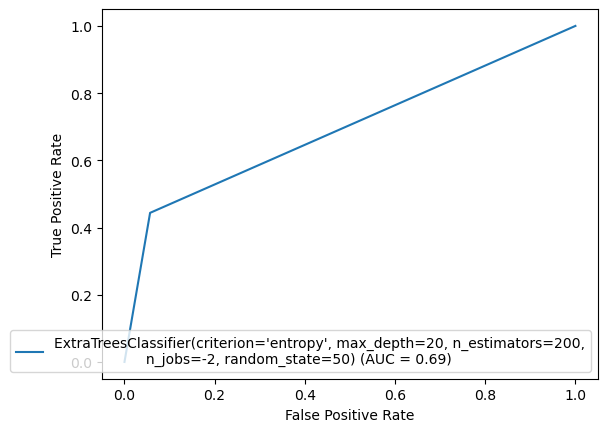

In [105]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

here we have plotted ROC curve for the final model and AUC value for the best model is 69%

# Saving the model

In [106]:
import joblib
joblib.dump(final_model,'census_income.pkl')

['census_income.pkl']

# Predicting the Saved Model

In [107]:
model = joblib.load('census_income.pkl')
pred = model.predict(x_test)
pred

array([0., 0., 0., ..., 1., 0., 0.])

In [108]:
a = np.array(y_test)
df1 = pd.DataFrame()
df1['Predicted'] = pred
df1['Original'] = a

In [109]:
df1

,Predicted,Original
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
7263,0.0,0.0
7264,0.0,1.0
7265,1.0,1.0
7266,0.0,0.0
